# Upper Confidence Bound (UCB)
We will be using UCB to solve the Multi-Armed Bandit Problem.

The confidence bound bounds the current and expected return values.
- For each iteration (round), the UCB algorithm picks the machine with the greatest upper confidence bound

### How Upper Confidence Bound Changes
If the player wins a round, then the confidence bound and current return value of the machine shifts up.  
If the player loses a round, then the confidence bound and current return value of the machine shifts down.

As each round is played, the confidence bound of the machine played shrinks because the program is more confident that the current return value is close to the expected return value.

After enough iterations, the algorithm converges to the most optimal machine to play because that machine's upper confidence bound will always be the greatest out of the other confidence bounds.

# UCB Algorithm Visualization
Here are the probability density function (pdf) graphs for each machine.

<img src="images/ucb/distributions_graphs.png" height="75%" width="75%"></img>
- D5 has the best distribution since the curve is to the most-right (high return values)

Let's plot each distribution's expected return (denoted by the dotted white-line) onto a diagram.
- The program will NOT know these expected return values, but for visualization-sake we'll show them on the diagram

<img src="images/ucb/distribution_diagram.png" height="75%" width="75%"></img>

Initialize the confidence bounds and current return value for each machine.

<img src="images/ucb/initialize_distributions.png" height="75%" width="75%"></img>

### First Round
The program will pick any machine because all of the upper confidence bounds are equal to each other.

The program picks the D3 machine, and we lose this round.

<img src="images/ucb/round_1.png" height="75%" width="75%"></img>
- The confidence bound and the current return value shifts down because we lost this round
- The confidence bound shrinks a little because we're more confident in our current return value converging to the actual return value

### Second Round
The program will pick at random D1, D2, D4, or D5 because they have the greatest upper confidence bounds.

The program picks the D4 machine, and we win this round.

<img src="images/ucb/round_2.png" height="75%" width="75%"></img>
- The confidence bound and the current return value shifts up because we won this round
- The confidence bound shrinks a little because we're more confident in our current return value converging to the actual return value

### Third Round
The program will pick at random D1, D2, or D5 because they have the greatest upper confidence bounds.

The program picks the D1 machine, and we win this round.

<img src="images/ucb/round_3.png" height="75%" width="75%"></img>
- The confidence bound and the current return value shifts up because we won this round
- The confidence bound shrinks a little because we're more confident in our current return value converging to the actual return value

### After a Few Rounds
After a few rounds, the program will sooner or later always choose to D5 because it will converge to almost always have the greatest upper confidence bound. And we can also confirm this because the expected return value is the largest.

<img src="images/ucb/few_rounds.png" height="75%" width="75%"></img>

In [100]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
# import the data set
ads_opt_df = pd.read_csv("datasets/ads_ctr_optimization.csv")

"""
Each row represents a round (or consumer), and if clicked the ad (1) or did not click the ad (0).

In the real world, we wouldn't have this data set and instead the UCB algorithm would
explore and exploit simutaneously to determine the optimal ad while users are clicking.
Therefore, as this data set is created, the UCB algorithm will run.

For testing purposes, we're going to simulate the "real world" in the UCB algorithm.
"""
ads_opt_df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [102]:
rounds = 10_000 # number of rows in the data frame
ads = 10 # number of columns in the data frame

# Random Selection
What if the program just randomly selected advertisements to show to a consumer?

As seen below, the total reward when randomly selecting an advertisement is around ~1200.

In [103]:
# import the random library
import random

In [104]:
total_reward = 0

# iterate through each row (round) in the data frame
for current_round in range(0, rounds):
    # select a random ad to show to this consumer
    ad = random.randrange(ads)
    
    # increase the total reward using this ad
    reward = ads_opt_df.values[current_round][ad]
    total_reward += reward
    
print("Total Reward: " + str(total_reward))

Total Reward: 1235


# UCB Model
We can receive a higher total reward than the random selection algorithm using UCB.

### UCB Algorithm
<img src="images/ucb/ucb_algorithm.png" height="65%" width="65%"></img>

As seen below, the total reward using UCB is around ~2200, which is better than the randomly selected reward value.

In [112]:
# import the math library
import math

In [118]:
# list that stores which ad that was selected at each round
ads_selected = []

# number of times each ad was selected
numbers_of_selections = [0] * ads

# sum of rewards of each ad
sums_of_rewards = [0] * ads

In [119]:
total_reward = 0

# iterate through each row (round) in the data frame
for current_round in range(0, rounds):
    max_upper_bound = 0
    ad_to_select = 0
    
    # iterate through each column (ad) in the data frame
    for ad in range(0, ads):
        if numbers_of_selections[ad] > 0:
            # compute the upper bound of this ad
            average_reward_of_ad = sums_of_rewards[ad] / numbers_of_selections[ad]
            delta_ad = math.sqrt(3/2 * math.log(current_round + 1) / numbers_of_selections[ad])
            upper_bound = average_reward_of_ad + delta_ad
        else:
            # this ad hasn't been selected, set its upper bound to a very large value to use it 
            upper_bound = 1e400
        
        if upper_bound > max_upper_bound:
            # found a larger upper bound, update the max upper bound and the ad to select
            max_upper_bound = upper_bound
            ad_to_select = ad
    
    # store the results of this round
    ads_selected.append(ad_to_select)
    numbers_of_selections[ad_to_select] += 1
    reward = ads_opt_df.values[current_round][ad_to_select]
    sums_of_rewards[ad_to_select] += reward
    total_reward += reward
    
print("Total Reward: " + str(total_reward))

Total Reward: 2178


### Optimal Advertisement
Let's determine the optimal ad that the UCB algorithm determined.

We can find this out by looking at which advertisement the UCB algorithm converged to within the last few rounds.

As seen below, the algorithm converged to the advertisement at index 4, which is advertisement 5.  
Therefore, we can conclude advertisement 5 is the optimal advertisement to show to consumers.

In [130]:
# output the last n ads selected from the algorithm
last_n = 10

ads_selected[-last_n:]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

# Visualization of UCB
We can further confirm that index 4 (advertisement 5) was the optimal advertisement using a histogram.

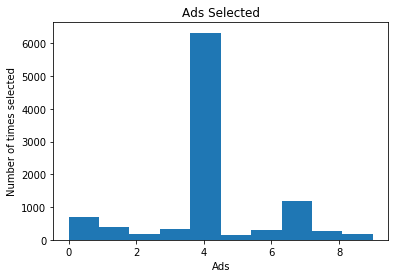

In [133]:
"""
Plot the advertisements selected as a histogram.
- x-axis is the advertisement index
- y-axis is the density (number of times the ad was selected)
"""
plt.hist(ads_selected)
plt.title("Ads Selected")
plt.xlabel("Ads")
plt.ylabel("Number of times selected")
plt.show()